In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from cleaning_function import *
import geopandas as gdp

In [2]:
X = pd.read_csv('predict.csv')
Y = pd.read_csv('response.csv')
location = pd.read_csv('location.csv')
Y


,0
0,282.466667
1,239.700000
2,336.766667
3,324.500000
4,298.600000
...,...
3137,165.266667
3138,231.400000
3139,114.366667
3140,224.700000


In [3]:
X = exclude_columns(X, ['cvd', 'death'])
X

,Percent_Population_Without_Health_Insurance_ACS2016_20,PercentPopulation_18yrs_And_Under_Without_Health_Insurance_ACS2016_20,Population_19_64yrs_Civilian_Noninstitutionalized_Population_For_Insurance_Coverage_ACS2016_20,Population_19_64yrs_Old_With_Health_Insurance_ACS2016_20,Percent_Population_19_64yrs_Old_Without_Health_Insurance_ACS2016_20,Population_65_And_Above_Civilian_Noninstitutionalized_Population_For_Insurance_Coverage_ACS2016_20,Population_65yrs_And_Over_With_Health_Insurance_ACS2016_20,Population_16yrs_And_Over_Without_Earning_ACS2016_20,Percent_Population_16yrs_And_Over_Without_Earning_ACS2016_20,Percent_Population_16yrs_And_Over_In_Middle_Class_Or_Upper_Earning_range_ACS2016_20,...,Population_25yrs_and_over_with_STEM_related_Degree_ACS2016_20,Index_For_Environment_With_Access_To_Healthy_Food_2015_17_CHR,Percent_Adults_20yrs_And_Over_Physical_Inactivity_2016_CHR,Percentage_Female_Ages_65_74_Received_Annual_Mammography_Screening_2017_CHR,Percentage_Households_Have_1_Or_More_Issue_WIth_The_House_Facilities_2012_16_CHR,Percent_Population_With_Low_Access_To_Store_USDA_2015,Percent_Household_With_Low_Income_And_Low_Access_to_Store_USDA_2015,Percent_Population_Under_18_With_Low_Access_To_Store_USDA_2015,Amount_of_SNAP_Benefits_Per_Capita_USDA_2017,statecounty
0,-0.077901,-0.459148,0.558164,0.567832,-0.005144,0.363381,0.366013,0.528944,0.170974,0.160601,...,0.636870,-0.384615,0.993377,0.0,0.273026,0.719627,0.778621,0.910873,0.139229,01Autauga County
1,0.168521,0.020050,3.334915,3.239965,0.223251,3.870753,3.857697,3.525758,0.147117,0.110555,...,4.572404,0.230769,-0.092715,0.2,0.049789,-0.136724,-0.155002,-0.125795,-0.298208,01Baldwin County
2,0.354531,-0.360902,-0.066140,-0.078791,0.586420,-0.014054,-0.012802,0.133523,1.296664,-1.030482,...,-0.166197,-1.615385,-0.490066,0.4,0.256724,0.162154,0.600694,-0.145244,1.284787,01Barbour County
3,0.095390,-0.657644,-0.057359,-0.055173,0.221193,-0.114749,-0.113239,0.038611,1.009499,-0.730209,...,-0.165958,0.076923,0.834437,-0.1,-0.574747,-0.838677,-0.556334,-0.761354,0.247178,01Bibb County
4,0.251192,-0.112281,0.582074,0.555637,0.313786,0.537748,0.537825,0.754790,0.785067,-0.130573,...,0.153496,0.538462,0.410596,-0.7,-0.564257,-0.711745,-0.516735,-0.632549,-0.217580,01Blount County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,0.914149,2.576441,-0.267904,-0.265458,0.521605,-0.277676,-0.276549,-0.338362,-0.460791,1.062329,...,-0.124019,0.615385,-0.635762,-1.2,-1.726320,-0.013727,-0.370660,-0.229598,-1.154980,56Sublette County
3138,0.531002,0.998496,0.359542,0.346229,0.262346,0.045712,0.044732,0.065787,-0.787718,0.967698,...,0.343299,0.000000,-0.291391,-0.4,-0.704664,1.344576,0.615717,1.498739,-0.817228,56Sweetwater County
3139,0.475358,1.014536,0.036067,0.036180,0.209877,-0.123034,-0.121543,-0.268705,-1.621825,1.825751,...,0.848242,0.384615,-2.066225,0.1,0.741867,0.557935,0.127222,0.166848,-1.288982,56Teton County
3140,0.446741,0.517293,-0.089435,-0.091827,0.363169,-0.184674,-0.185305,-0.227679,-0.735586,0.550045,...,-0.052364,-0.230769,0.000000,-1.0,-0.382762,0.166864,0.456740,0.541325,-0.568627,56Uinta County


In [4]:
location

,Latitude,Longitude
0,+32.536382°,–86.644490°
1,+30.659218°,–87.746067°
2,+31.870670°,–85.405456°
3,+33.015893°,–87.127148°
4,+33.977448°,–86.567246°
...,...,...
3137,+42.767928°,–109.916170°
3138,+41.660339°,–108.875676°
3139,+44.049321°,–110.588102°
3140,+41.284726°,–110.558947°


In [5]:
location['Longitude'] = location['Longitude'].str.replace('°', '', regex=False).str.strip()
location['Longitude'] = location['Longitude'].str.replace('–', '-', regex=False)
location['Longitude'] = location['Longitude'].astype(float)

location['Latitude'] = location['Latitude'].str.replace('°', '', regex=False).str.strip()
location['Latitude'] = location['Latitude'].str.replace('–', '-', regex=False)
location['Latitude'] = location['Latitude'].astype(float)

In [6]:
location

,Latitude,Longitude
0,32.536382,-86.644490
1,30.659218,-87.746067
2,31.870670,-85.405456
3,33.015893,-87.127148
4,33.977448,-86.567246
...,...,...
3137,42.767928,-109.916170
3138,41.660339,-108.875676
3139,44.049321,-110.588102
3140,41.284726,-110.558947


In [29]:
Y = KNN_single_columns_imputation(Y)
X = X.drop(columns = 'statecounty', errors='ignore')
original_columns = X.columns.tolist()


59

In [8]:
coords = location[['Latitude', 'Longitude']].to_numpy()
predictor = X.to_numpy()
response = Y.to_numpy()

In [9]:
Y.isnull().sum()

0    0
dtype: int64

In [ ]:
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

selector = Sel_BW(coords, response, predictor)
optimal_bandwidth = selector.search()
gwr_model = GWR(coords, response, predictor, bw=optimal_bandwidth)
gwr_results = gwr_model.fit()

In [11]:
print(coords.shape)
print(predictor.shape)
print(response.shape)


(3142, 2)
(3142, 59)
(3142, 1)


In [14]:
# Summary of the model
print(gwr_results.summary)

# # Access local coefficients
# local_coefficients = gwr_results.params

# # Example: Visualize coefficients for a predictor
# import matplotlib.pyplot as plt

# plt.scatter(coords[:, 0], coords[:, 1], c=local_coefficients[:, 2], cmap='coolwarm')
# plt.colorbar(label='Coefficient for predictor1')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Spatial Variation in Predictor1 Coefficients')
# plt.show()
gwr_results.summary()

<bound method GWRResults.summary of <mgwr.gwr.GWRResults object at 0x17afeec50>>
Model type                                                         Gaussian
Number of observations:                                                3142
Number of covariates:                                                    60

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                        4160116.480
Log-likelihood:                                                  -15751.342
AIC:                                                              31622.684
AICc:                                                             31625.159
BIC:                                                            4135298.321
R2:                                                                   0.514
Adj. R2:                                                              0.505

Variable                              Est.         SE  

In [22]:
original_columns

['Feature1',
 'Population',
 'Income',
 'Education',
 'Age',
 'Unnamed_5',
 'Unnamed_6',
 'Unnamed_7',
 'Unnamed_8',
 'Unnamed_9',
 'Unnamed_10',
 'Unnamed_11',
 'Unnamed_12',
 'Unnamed_13',
 'Unnamed_14',
 'Unnamed_15',
 'Unnamed_16',
 'Unnamed_17',
 'Unnamed_18',
 'Unnamed_19',
 'Unnamed_20',
 'Unnamed_21',
 'Unnamed_22',
 'Unnamed_23',
 'Unnamed_24',
 'Unnamed_25',
 'Unnamed_26',
 'Unnamed_27',
 'Unnamed_28',
 'Unnamed_29',
 'Unnamed_30',
 'Unnamed_31',
 'Unnamed_32',
 'Unnamed_33',
 'Unnamed_34',
 'Unnamed_35',
 'Unnamed_36',
 'Unnamed_37',
 'Unnamed_38',
 'Unnamed_39',
 'Unnamed_40',
 'Unnamed_41',
 'Unnamed_42',
 'Unnamed_43',
 'Unnamed_44',
 'Unnamed_45',
 'Unnamed_46',
 'Unnamed_47',
 'Unnamed_48',
 'Unnamed_49',
 'Unnamed_50',
 'Unnamed_51',
 'Unnamed_52',
 'Unnamed_53',
 'Unnamed_54',
 'Unnamed_55',
 'Unnamed_56',
 'Unnamed_57',
 'Unnamed_58',
 'Unnamed_59']


--- GWR Results (With Original Column Names) ---

Summary Statistics for Coefficients:
                                             Variable  Mean Estimate (|coeff|)
0   Percent_Population_Without_Health_Insurance_AC...               243.309220
1   Population_65yrs_And_Over_With_Health_Insuranc...               217.086533
2   Population_16yrs_And_Over_Without_Earning_ACS2...               193.907561
3   Percent_Male_25yrs_and_over_without_High_Schoo...               116.073796
4         Percent_Population_Under_Poverty_ACS2016_20                79.655025
5   Percent_Population_65yrs_And_Over_In_Labor_For...                63.466817
6   Male_25yrs_and_over_with_college_or_advanced_D...                62.026402
7   Female_25yrs_and_over_with_high_school_Diploma...                54.826931
8   Female_65yrs_And_Over_Not_In_Labor_Force_ACS20...                54.719751
9   Percent_Population_In_Management_Business_Scie...                44.169545
10  Percent_Male_16yrs_And_Over_Without_Ear

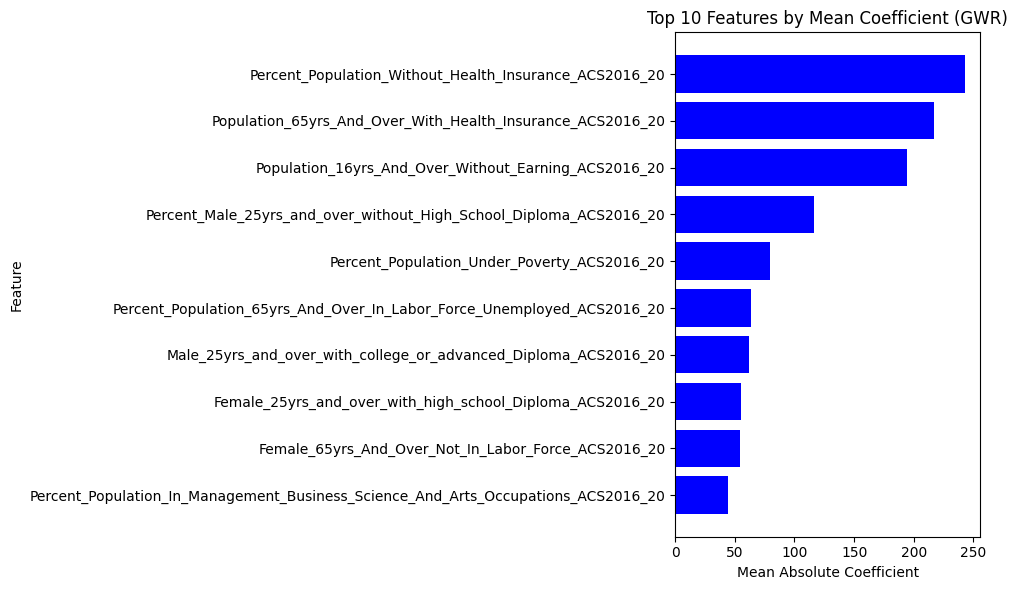

In [ ]:
import matplotlib.pyplot as plt
original_columns.append("Unnamed_59")  
index_to_column = {f"X{i}": col for i, col in enumerate(original_columns)}

params = gwr_results.params
t_values = gwr_results.tvalues

results_df = pd.DataFrame(params, columns=[index_to_column[f"X{i}"] for i in range(params.shape[1])])
tvalues_df = pd.DataFrame(t_values, columns=[index_to_column[f"X{i}"] for i in range(t_values.shape[1])])

mean_estimates = results_df.mean().abs().sort_values(ascending=False)
summary_table = pd.DataFrame({
    "Variable": mean_estimates.index,
    "Mean Estimate (|coeff|)": mean_estimates.values
})

print("\n--- GWR Results (With Original Column Names) ---\n")
print("Summary Statistics for Coefficients:")
print(summary_table.head(20))
top10 = summary_table.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["Variable"], top10["Mean Estimate (|coeff|)"], color="blue")
plt.title("Top 10 Features by Mean Coefficient (GWR)")
plt.xlabel("Mean Absolute Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [27]:
original_columns

['Percent_Population_Without_Health_Insurance_ACS2016_20',
 'PercentPopulation_18yrs_And_Under_Without_Health_Insurance_ACS2016_20',
 'Population_19_64yrs_Civilian_Noninstitutionalized_Population_For_Insurance_Coverage_ACS2016_20',
 'Population_19_64yrs_Old_With_Health_Insurance_ACS2016_20',
 'Percent_Population_19_64yrs_Old_Without_Health_Insurance_ACS2016_20',
 'Population_65_And_Above_Civilian_Noninstitutionalized_Population_For_Insurance_Coverage_ACS2016_20',
 'Population_65yrs_And_Over_With_Health_Insurance_ACS2016_20',
 'Population_16yrs_And_Over_Without_Earning_ACS2016_20',
 'Percent_Population_16yrs_And_Over_Without_Earning_ACS2016_20',
 'Percent_Population_16yrs_And_Over_In_Middle_Class_Or_Upper_Earning_range_ACS2016_20',
 'Male_16yrs_And_Over_Old_Without_Earning_ACS2016_20',
 'Percent_Male_16yrs_And_Over_Without_Earning_ACS2016_20',
 'Percent_Male_16yrs_And_Over_In_Middle_Class_Or_Upper_Earning_range_ACS2016_20',
 'Female_16yrs_And_Over_In_Lower_Class_Earning_range_ACS2016_20

In [30]:
print(f"Number of columns in params: {params.shape[1]}")
print(f"Number of original columns provided: {len(original_columns)}")


Number of columns in params: 60
Number of original columns provided: 59
